In [49]:
import pandas as pd
import numpy as np
import seaborn as sns

In [50]:
data = pd.read_csv('/content/drive/MyDrive/Movie Recommendation System/Data processing /Datasets/hulu_titles.csv')

In [51]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


In [52]:
data.dtypes

show_id          object
type             object
title            object
director         object
cast            float64
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
description      object
dtype: object

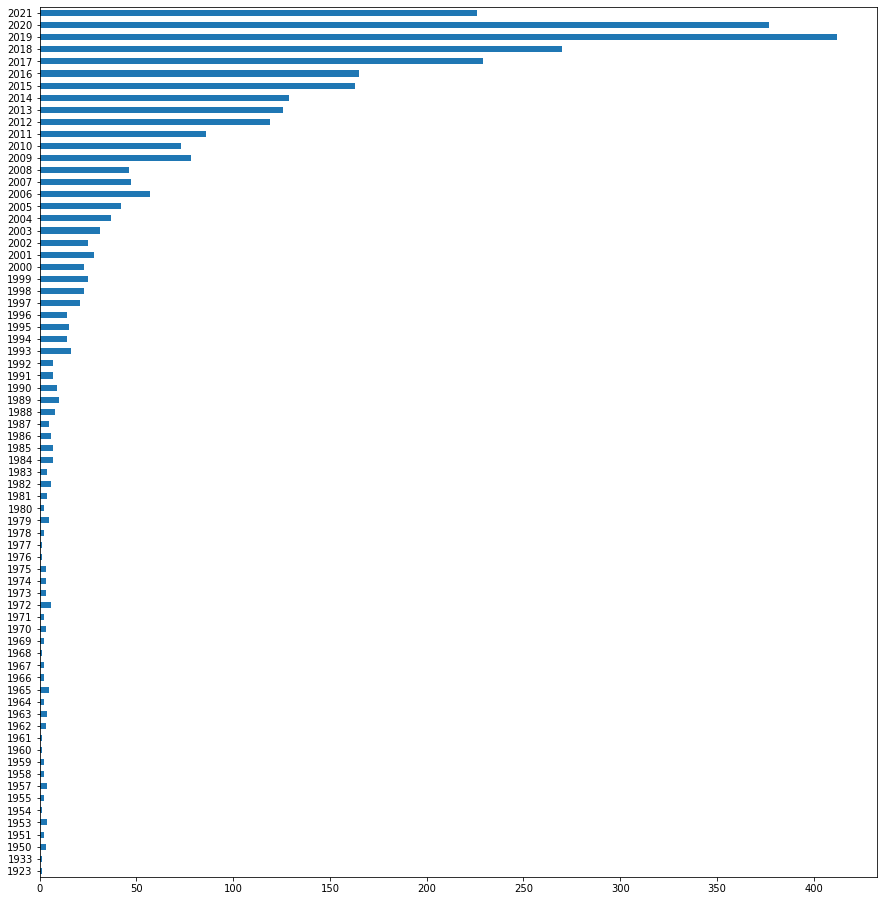

In [53]:
data.release_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))

In [54]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [55]:
data.drop(['show_id','date_added','release_year','duration','description'],axis=1,inplace=True)

In [56]:
data.head()

,type,title,director,cast,country,rating,listed_in
0,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,TV-MA,"Comedy, Stand Up"
1,Movie,Silent Night,NaN,NaN,NaN,NaN,"Crime, Drama, Thriller"
2,Movie,The Marksman,NaN,NaN,NaN,PG-13,"Action, Thriller"
3,Movie,Gaia,NaN,NaN,NaN,R,Horror
4,Movie,Settlers,NaN,NaN,NaN,NaN,"Science Fiction, Thriller"


In [57]:
data.isna().sum()

type            0
title           0
director     3070
cast         3073
country      1453
rating        520
listed_in       0
dtype: int64

In [58]:
#as there is a large amount of data for director cast country and raitying is missing it is not possible to create a viable model

# disney plus

In [59]:
data = pd.read_csv('/content/drive/MyDrive/Movie Recommendation System/Data processing /Datasets/disney_plus_titles.csv')

In [60]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


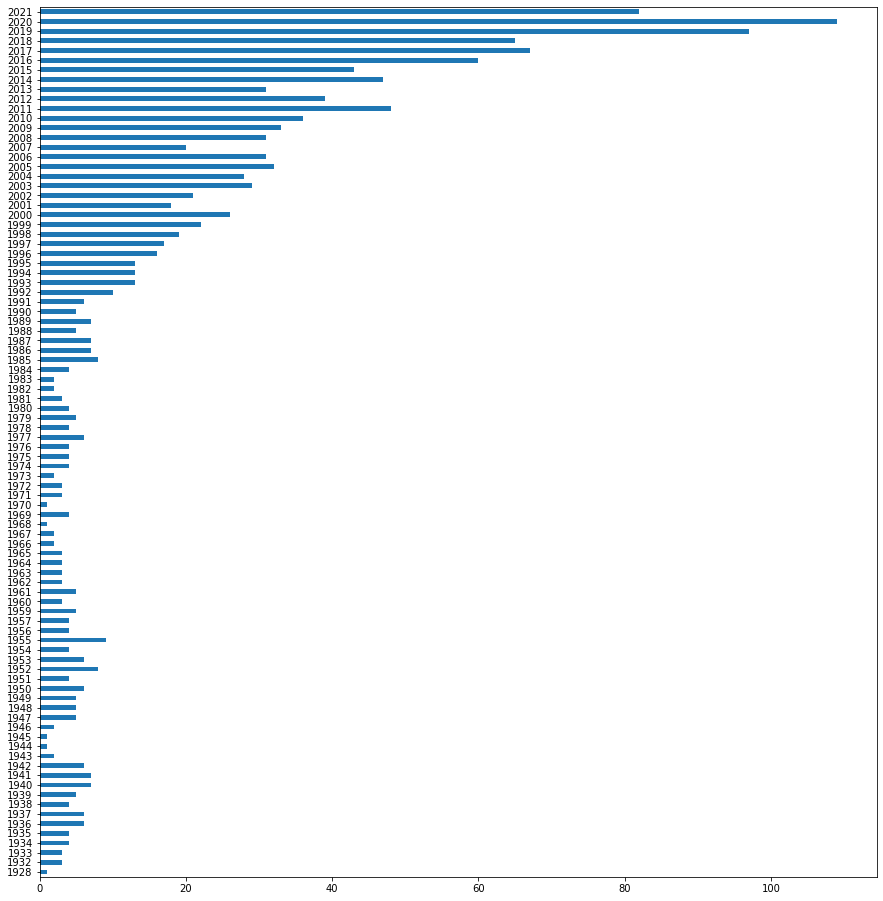

In [61]:
data.release_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))

In [62]:
data.drop(['show_id','date_added','release_year','duration','description'],axis=1,inplace=True)


In [63]:
data.head()

,type,title,director,cast,country,rating,listed_in
0,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,TV-PG,Documentary
1,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada",G,"Comedy, Fantasy, Kids"
2,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,PG-13,"Coming of Age, Drama, Romance"
3,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,TV-PG,"Animals & Nature, Docuseries, Family"
4,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,TV-Y,"Action-Adventure, Animation, Kids"


In [64]:
data.isna().sum()

type           0
title          0
director     440
cast         174
country      175
rating         2
listed_in      0
dtype: int64

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   type       1368 non-null   object
 1   title      1368 non-null   object
 2   director   928 non-null    object
 3   cast       1194 non-null   object
 4   country    1193 non-null   object
 5   rating     1366 non-null   object
 6   listed_in  1368 non-null   object
dtypes: object(7)
memory usage: 74.9+ KB


In [66]:
# as director both have large number of nan values they are droped
data.drop(labels=['director'],axis=1,inplace=True)

In [67]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   type       1368 non-null   object
 1   title      1368 non-null   object
 2   cast       1194 non-null   object
 3   country    1193 non-null   object
 4   rating     1366 non-null   object
 5   listed_in  1368 non-null   object
dtypes: object(6)
memory usage: 64.2+ KB


In [68]:
data.isna().sum()


type           0
title          0
cast         174
country      175
rating         2
listed_in      0
dtype: int64

In [69]:
data.cast.fillna('unknown',inplace=True)

In [70]:
data.rating.fillna('unknown',inplace=True)

In [71]:
data.country.fillna('unknown',inplace=True)

In [72]:
data['cast']=data['cast'].map(lambda x:x.lower())
data['listed_in']=data['listed_in'].map(lambda x:x.lower())
data['title']=data['title'].map(lambda x:x.lower())

In [73]:
data['country']=data['country'].map(lambda x:x.lower())

In [74]:
data['rating']=data['rating'].map(lambda x:x.lower())

In [75]:
data['cast_list'] = data['cast'].map(lambda x : x.split(','))
data['cast_list'] = data['cast_list'].map(lambda x : x[:3])
data['cast_list'] = data['cast_list'].map(lambda x : ' '.join(str(ele) for ele in x))
data['cast'] = data['cast_list']
data.drop(labels=['cast_list'],axis=1,inplace=True)

In [76]:
data['combination'] = data['type'] + ' ' + data['rating'] + ' ' + data['listed_in'] +' ' + data['cast'] + ' ' + data['country']


In [77]:
data.tail()

,type,title,cast,country,rating,listed_in,combination
1363,Movie,the sword in the stone,sebastian cabot karl swenson rickie sorensen,united states,g,"action-adventure, animation, comedy","Movie g action-adventure, animation, comedy se..."
1364,Movie,those calloways,brian keith vera miles brandon de wilde,united states,pg,"animals & nature, drama, family","Movie pg animals & nature, drama, family brian..."
1365,TV Show,disney kirby buckets,jacob bertrand mekai curtis cade sutton,united states,tv-y7,"action-adventure, comedy, coming of age","TV Show tv-y7 action-adventure, comedy, coming..."
1366,TV Show,disney mech-x4,nathaniel potvin raymond cham kamran lucas,canada,tv-y7,"action-adventure, comedy, science fiction","TV Show tv-y7 action-adventure, comedy, scienc..."
1367,TV Show,imagination movers,rich collins dave poche scott durbin,united states,tv-y,"kids, music","TV Show tv-y kids, music rich collins dave po..."


In [78]:
disney_plus_movie = data[data['type']=='Movie']
disney_plus_tv_show = data[data['type']=='TV Show']


In [79]:
disney_plus_movie.to_csv("disney_plus_movie.csv",index=False)

In [80]:
disney_plus_tv_show.to_csv("disney_plus_tv_show.csv",index=False)